In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
aliments = pd.read_csv("../data/aliments.csv")
equipements = pd.read_csv("../data/equipements.csv")
energie = pd.read_csv("../data/energie.csv")

In [113]:
aliments_filtered = aliments.rename(columns={"french_name" : "nom"})
aliments_filtered = aliments_filtered.drop_duplicates(subset=aliments_filtered.columns.difference(['id']))
aliments_filtered = aliments_filtered[~aliments_filtered['french_tag'].str.contains('viandes cuites', case=False, na=False)]
aliments_filtered = aliments_filtered.drop(
    ['id', 'status', 'english_name', 'english_attribut', 'type', 'french_tag', 'english_tag', 'validity_range', 'comment', 'unit'], axis =1)
aliments_filtered[aliments_filtered["nom"] == 'Yaourt']

,nom,french_attribut,CO2,main_type,sous_type
2417,Yaourt,lait fermenté ou spécialité laitière,1.46,Lait et produits laitiers,Produits laitiers frais et assimilés
2419,Yaourt,lait fermenté ou spécialité laitière,1.54,Lait et produits laitiers,Produits laitiers frais et assimilés
2420,Yaourt,lait fermenté ou spécialité laitière,2.20,Lait et produits laitiers,Produits laitiers frais et assimilés
2422,Yaourt,lait fermenté ou spécialité laitière,5.55,Lait et produits laitiers,Produits laitiers frais et assimilés
2423,Yaourt,lait fermenté ou spécialité laitière,2.14,Lait et produits laitiers,Produits laitiers frais et assimilés
2428,Yaourt,lait fermenté ou spécialité laitière,2.12,Lait et produits laitiers,Produits laitiers frais et assimilés
2431,Yaourt,lait fermenté ou spécialité laitière,1.52,Lait et produits laitiers,Produits laitiers frais et assimilés


In [114]:
equipents_filtered = equipements.drop(['french_name', 'status', 'type', 'english_name', 'french_attribut', 'english_attribut', 'english_tag', 'unit', 'validity_range', 'comment', 'french_tag', 'id'], axis=1).rename(columns={"complete_name" : "nom"}).head()
equipents_filtered


,CO2,nom
0,16.8,Appareil à raclettes 6-8p
1,47.3,Aspirateur ménager avec sac
2,52.4,Aspirateur ménager sans sac
3,83.0,Aspirateur professionnel à traineaux
4,160.0,Ballon électrique chauffe-eau 200L


In [115]:
energie_filtered = energie.drop(['status', 'id', 'english_name', 'french_attribut', 'english_attribut', 'type', 'french_tag', 'english_tag', 'validity_range', 'comment'], axis = 1)
energie_filtered.rename(columns={"french_name" : "nom"})

,nom,unit,CO2
0,Electricité,kgCO2e/kWh,0.0580
1,Fioul domestique,kgCO2e/litre,2.9500
2,Granulés,kgCO2e/kg,0.0469
3,Gaz naturel - 2022,kgCO2e/m3,2.3200


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Viandes, oeufs, poissons'),
  Text(1, 0, 'Fruits, légumes, légumineuses et oléagineux'),
  Text(2, 0, 'Produits céréaliers'),
  Text(3, 0, 'Entrées et plats composés'),
  Text(4, 0, 'Lait et produits laitiers'),
  Text(5, 0, 'Aides culinaires et ingrédients divers'),
  Text(6, 0, 'Boissons'),
  Text(7, 0, 'Produits sucrés'),
  Text(8, 0, 'Matières grasses'),
  Text(9, 0, 'Aliments infantiles'),
  Text(10, 0, 'Glaces et sorbets')])

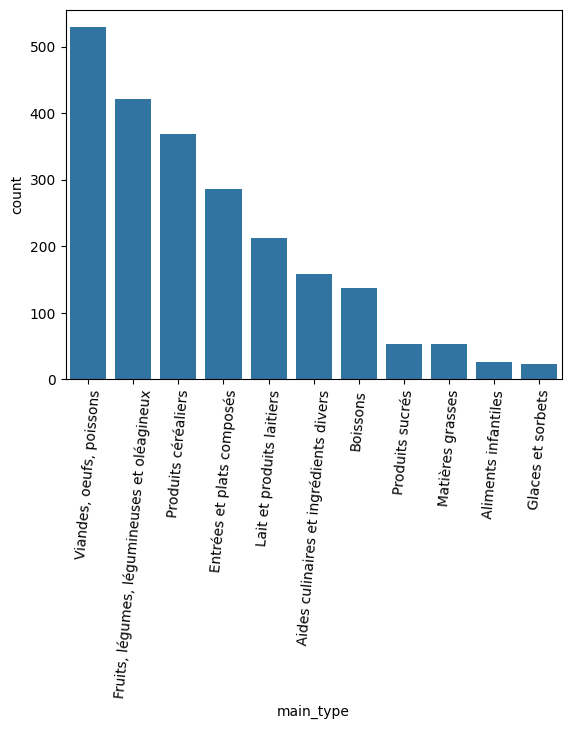

In [116]:
type_value = aliments_filtered['main_type'].value_counts().index
sns.countplot(x='main_type', data=aliments_filtered, order=type_value)
plt.xticks(rotation=85)

In [117]:
aliments_filtered.drop_duplicates().value_counts()

nom                      french_attribut                                                     CO2    main_type                                    sous_type
Abricot                  dénoyauté                                                           0.884  Fruits, légumes, légumineuses et oléagineux  Fruits       1
Pomme Golden             pulpe et peau                                                       0.463  Fruits, légumes, légumineuses et oléagineux  Fruits       1
Pomme                    sèche                                                               1.690  Fruits, légumes, légumineuses et oléagineux  Fruits       1
                         pulpe et peau                                                       0.397  Fruits, légumes, légumineuses et oléagineux  Fruits       1
                         pulpe                                                               0.849  Fruits, légumes, légumineuses et oléagineux  Fruits       1
                                             

In [118]:
aliments_filtered['nom'].value_counts() > 1

nom
Porc                         True
Boeuf                        True
Sandwich baguette            True
Veau                         True
Oeuf                         True
                            ...  
Fraise de saison            False
Fraise                      False
Fourme de Montbrison        False
Fourme d'Ambert             False
Yaourt au lait de chèvre    False
Name: count, Length: 1610, dtype: bool

In [119]:
names_count = aliments_filtered['nom'].value_counts()
names_count

nom
Porc                        23
Boeuf                       18
Sandwich baguette           17
Veau                        14
Oeuf                        13
                            ..
Fraise de saison             1
Fraise                       1
Fourme de Montbrison         1
Fourme d'Ambert              1
Yaourt au lait de chèvre     1
Name: count, Length: 1610, dtype: int64

In [120]:
aliments_filtered[aliments_filtered['nom'] == 'Tomate']

,nom,french_attribut,CO2,main_type,sous_type
2319,Tomate,concentré,2.830,"Fruits, légumes, légumineuses et oléagineux",Légumes
2320,Tomate,coulis,0.675,"Fruits, légumes, légumineuses et oléagineux",Légumes
2321,Tomate,crue,0.705,"Fruits, légumes, légumineuses et oléagineux",Légumes
2322,Tomate,double concentré,4.140,"Fruits, légumes, légumineuses et oléagineux",Légumes
2323,Tomate,pelée,1.270,"Fruits, légumes, légumineuses et oléagineux",Légumes
2324,Tomate,pulpe,0.921,"Fruits, légumes, légumineuses et oléagineux",Légumes
2325,Tomate,pulpe et peau,1.240,"Fruits, légumes, légumineuses et oléagineux",Légumes
2326,Tomate,pulpe et peau,1.220,"Fruits, légumes, légumineuses et oléagineux",Légumes
2327,Tomate,purée,0.675,"Fruits, légumes, légumineuses et oléagineux",Légumes
2328,Tomate,séchée,7.500,"Fruits, légumes, légumineuses et oléagineux",Légumes


In [121]:
aliments_grouped = aliments_filtered.groupby(['nom', 'french_attribut', 'CO2'], as_index=False).first()

aliments_final = aliments_grouped.groupby(['nom', 'french_attribut'], as_index=False).agg({
    'CO2': lambda x: round(x.mean(), 2),  # Moyenne si plusieurs valeurs différentes
    'main_type': 'first',  # Garder un type arbitraire si nécessaire
    'sous_type': 'first'
})
aliments_final

,nom,french_attribut,CO2,main_type,sous_type
0,Abricot,dénoyauté,1.35,"Fruits, légumes, légumineuses et oléagineux",Fruits
1,Abricot au sirop,appertisé,0.75,"Fruits, légumes, légumineuses et oléagineux",Fruits
2,Abricot au sirop léger,appertisé,0.74,"Fruits, légumes, légumineuses et oléagineux",Fruits
3,Agar (algue),cru,6.77,Aides culinaires et ingrédients divers,Algues
4,Agneau,collier,41.30,"Viandes, oeufs, poissons",Viandes crues
...,...,...,...,...,...
1489,Épinard,cru,0.39,"Fruits, légumes, légumineuses et oléagineux",Légumes
1490,Épinard,cuit,0.80,"Fruits, légumes, légumineuses et oléagineux",Légumes
1491,Épinard,jeunes pousses pour salades,0.39,"Fruits, légumes, légumineuses et oléagineux",Légumes
1492,Épinard,purée,0.72,"Fruits, légumes, légumineuses et oléagineux",Légumes


In [122]:
aliments_final[aliments_final['nom'] == 'Boeuf']

,nom,french_attribut,CO2,main_type,sous_type
112,Boeuf,bavette d'aloyau,27.8,"Viandes, oeufs, poissons",Viandes crues
113,Boeuf,boule de macreuse,27.9,"Viandes, oeufs, poissons",Viandes crues
114,Boeuf,boulettes cuites,30.9,"Viandes, oeufs, poissons",Autres produits à base de viande
115,Boeuf,côte,28.0,"Viandes, oeufs, poissons",Viandes crues
116,Boeuf,entrecôte,28.0,"Viandes, oeufs, poissons",Viandes crues
117,Boeuf,faux-filet,27.8,"Viandes, oeufs, poissons",Viandes crues
118,Boeuf,gîte à la noix,27.8,"Viandes, oeufs, poissons",Viandes crues
119,Boeuf,hampe,27.8,"Viandes, oeufs, poissons",Viandes crues
120,Boeuf,jarret,28.0,"Viandes, oeufs, poissons",Viandes crues
121,Boeuf,joue,27.8,"Viandes, oeufs, poissons",Viandes crues


In [123]:
aliments_final = aliments_final[~aliments_final['french_attribut'].str.contains(r'\bcuit(?:e|es|s)?\b', case=False, na=False)]
aliments_final

final_count = aliments_final['french_attribut'].value_counts()

final_count

french_attribut
cru                            137
crue                            98
préemballée                     57
pulpe                           33
appertisé                       28
                              ... 
oie                              1
lapin                            1
génisse                          1
canard                           1
jeunes pousses pour salades      1
Name: count, Length: 511, dtype: int64

In [124]:
def merge_attributes(group):
    if len(group) > 1:
        merged_attribut = "-".join(group['french_attribut'])
        return pd.DataFrame({
            'nom': [group['nom'].iloc[0]],
            'french_attribut': [merged_attribut],
            'CO2': [group['CO2'].iloc[0]],
            'main_type': [group['main_type'].iloc[0]]
        })
    return group

aliments_final = aliments_final.groupby(['nom', 'CO2'], group_keys=False).apply(merge_attributes)

C:\Users\hacho\AppData\Local\Temp\ipykernel_24548\1676618632.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aliments_final = aliments_final.groupby(['nom', 'CO2'], group_keys=False).apply(merge_attributes)


In [125]:
aliments_final['french_attribut'].value_counts()

french_attribut
cru                                                                   135
crue                                                                   95
préemballée                                                            54
pulpe                                                                  31
appertisé                                                              27
                                                                     ... 
au lait pasteurisé ou cru (type crottin frais ou bûchette fraîche)      1
au lait cru (type palet ou crottin frais)                               1
gourmand                                                                1
3% MG environ                                                           1
cru-jeunes pousses pour salades                                         1
Name: count, Length: 471, dtype: int64

In [126]:
cru_rows = aliments_final[aliments_final['french_attribut'].str.contains(r'\bcru(?:e|es|-[^\s]*)?\b', case=False, na=False)]
cru_rows

,nom,french_attribut,CO2,main_type,sous_type
3,Agar (algue),cru,6.77,Aides culinaires et ingrédients divers,Algues
11,Ail,cru,0.36,Aides culinaires et ingrédients divers,Herbes
15,Amarante,crue,1.16,Produits céréaliers,"Pâtes, riz et céréales"
22,Anchois commun,cru,2.15,"Viandes, oeufs, poissons",Poissons crus
25,Andouillette,crue,16.10,"Viandes, oeufs, poissons",Charcuteries
...,...,...,...,...,...
1480,Échalote,crue,0.36,"Fruits, légumes, légumineuses et oléagineux",Légumes
1482,Églefin,cru,10.80,"Viandes, oeufs, poissons",Poissons crus
1486,Épeautre,cru,1.16,Produits céréaliers,"Pâtes, riz et céréales"
1487,Éperlan,cru,1.94,"Viandes, oeufs, poissons",Poissons crus


In [127]:
aliments_final['french_attribut'] = aliments_final['french_attribut'].str.replace(r'\bcru(?:e|es|-[^\s]*| pousses pour salades)?\b', 'cru', case=False, regex=True)
aliments_final['french_attribut'] = aliments_final['french_attribut'].str.replace(r'\bpréemballé(?:e|es|-[^\s]*| à réchauffer)?\b', 'préemballé', case=False, regex=True)
aliments_final['french_attribut'] = aliments_final['french_attribut'].str.replace(r'\bsurgelé(?:e|es|-[^\s]*)?\b', 'surgelé', case=False, regex=True)
aliments_final['french_attribut'] = aliments_final['french_attribut'].str.replace(r'\bséché(?:e|es|-[^\s]*)?\b', 'séché', case=False, regex=True)

aliments_final['main_type'] = aliments_final['main_type'].replace('Fruits, légumes, légumineuses et oléagineux', 'Fruits et Légumes')
aliments_final['main_type'] = aliments_final['main_type'].replace('Entrées et plats composés', 'Plats composés')
aliments_final['main_type'] = aliments_final['main_type'].replace('Lait et produits laitiers', 'Produits Laitiers')

In [128]:
final_count = aliments_final['french_attribut'].value_counts()
final_count[final_count == 1]

french_attribut
cru-porc et buf                             1
pur buf                                     1
préfrit                                      1
avec féculent-dès 4-6 mois                   1
Pangasius                                    1
                                            ..
au lait cru (type palet ou crottin frais)    1
gourmand                                     1
3% MG environ                                1
0% MG                                        1
cru pousses pour salades                     1
Name: count, Length: 350, dtype: int64

In [129]:
aliments_final['main_type'].value_counts()

aliments_final[aliments_final['main_type']=='Glaces et sorbets']

,nom,french_attribut,CO2,main_type,sous_type
425,Dessert glacé,type sundae,1.75,Glaces et sorbets,Desserts glacés
426,Dessert glacé feuilleté,à partager,1.75,Glaces et sorbets,Desserts glacés
0,Glace ou crème glacée,bâtonnet-cône (taille standard)-en bac-gourman...,1.75,Glaces et sorbets,NaN
1321,Sorbet,en bac,0.99,Glaces et sorbets,Sorbets
1320,Sorbet,bâtonnet,1.07,Glaces et sorbets,Sorbets


In [147]:
glaces_sorbets = aliments_final[aliments_final['main_type'] == 'Glaces et sorbets']

# Calculer la moyenne des glaces
glaces = glaces_sorbets.iloc[:3]  # Les trois premières lignes sont des glaces
glaces_avg = {
    'nom': 'Glace',
    'french_attribut': 'type sundae/à partager/bâtonnet-cône',
    'CO2': glaces['CO2'].mean(),
    'main_type': 'Glaces et sorbets'
}

# Calculer la moyenne des sorbets
sorbets = glaces_sorbets.iloc[3:]  # Les deux dernières lignes sont des sorbets
sorbets_avg = {
    'nom': 'Sorbet',
    'french_attribut': 'en bac/bâtonnet',
    'CO2': sorbets['CO2'].mean(),
    'main_type': 'Glaces et sorbets'
}

# Créer un nouveau DataFrame avec les moyennes calculées
glaces_sorbets_cleaned = pd.DataFrame([glaces_avg, sorbets_avg])

# Supprimer les anciennes entrées de glaces et sorbets dans la base originale
aliments_final = aliments_final[aliments_final['main_type'] != 'Glaces et sorbets']

# Ajouter les nouvelles entrées nettoyées
aliments_final = pd.concat([aliments_final, glaces_sorbets_cleaned], ignore_index=True)

# Arrondir le CO2 à 2 chiffres après la virgule
aliments_final['CO2'] = aliments_final['CO2'].round(2)


In [148]:
aliments_final = aliments_final[
    ~((aliments_final['main_type'] == "Aliments infantiles") & 
      (~aliments_final['nom'].str.contains("Plat légumes", case=False, na=False)))
]
aliments_final

,nom,french_attribut,CO2,main_type,sous_type
0,Abricot,dénoyauté,1.35,Fruits et Légumes,Fruits
1,Abricot au sirop,appertisé,0.75,Fruits et Légumes,Fruits
2,Abricot au sirop léger,appertisé,0.74,Fruits et Légumes,Fruits
3,Agar (algue),cru,6.77,Aides culinaires et ingrédients divers,Algues
4,Agneau,épaule,33.00,"Viandes, oeufs, poissons",Viandes crues
...,...,...,...,...,...
1140,Chocolat au lait,tout type,12.70,Produits sucrés,Chocolats
1141,Chocolat noir,tout type,17.10,Produits sucrés,Chocolats
1142,Chocolat blanc,tout type,11.30,Produits sucrés,Chocolats
1143,Glace,type sundae/à partager/bâtonnet-cône,1.39,Glaces et sorbets,NaN


In [150]:
produits_sucres = aliments_final[aliments_final['main_type'] == 'Produits sucrés']

# Regrouper les différents types de chocolat
chocolat_types = ['Chocolat au lait', 'Chocolat noir', 'Chocolat blanc']
chocolat_grouped = []

for chocolat in chocolat_types:
    # Filtrer les entrées correspondant à un type spécifique de chocolat, incluant les variantes
    chocolat_entries = produits_sucres[produits_sucres['nom'].str.contains(f'^{chocolat}', case=False, na=False)]
    
    if not chocolat_entries.empty:
        # Vérifier si plusieurs valeurs de CO2 existent
        if chocolat_entries['CO2'].nunique() > 1:
            # Garder uniquement les entrées avec le CO2 le plus fréquent
            correct_co2 = chocolat_entries['CO2'].mode()[0]
            chocolat_entries = chocolat_entries[chocolat_entries['CO2'] == correct_co2]

        # Créer une entrée regroupée pour ce type de chocolat
        chocolat_grouped.append({
            'nom': chocolat,
            'french_attribut': 'tout type',
            'CO2': chocolat_entries['CO2'].iloc[0],
            'main_type': 'Produits sucrés',
            'sous_type': 'Chocolat'

        })

# Supprimer toutes les anciennes entrées de chocolat dans la base originale
aliments_final = aliments_final[~((aliments_final['main_type'] == 'Produits sucrés') &
                      (aliments_final['nom'].str.contains('|'.join(chocolat_types), case=False, na=False)))]

# Ajouter les nouvelles entrées regroupées
aliments_final = pd.concat([aliments_final, pd.DataFrame(chocolat_grouped)], ignore_index=True)

In [133]:
beurre_group = aliments_final[aliments_final['nom'].str.contains('Beurre', case=False)]
beurre_aggregated = {
    'nom': 'Beurre (tous types)',
    'french_attribut': ' / '.join(set(beurre_group['french_attribut'])),
    'CO2': beurre_group['CO2'].mean(),
    'main_type': 'Matières grasses'
}

# Regrouper les matières grasses végétales
vegetal_group = aliments_final[aliments_final['nom'].str.contains('Matière grasse végétale', case=False)]
vegetal_aggregated = {
    'nom': 'Matière grasse végétale (tous types)',
    'french_attribut': ' / '.join(set(vegetal_group['french_attribut'])),
    'CO2': vegetal_group['CO2'].mean(),
    'main_type': 'Matières grasses'

}

combined_group = aliments_final[aliments_final['nom'].str.contains('Huile combinée', case=False)]
combined_aggregated = {
    'nom': 'Huile combinée',
    'french_attribut': ' / '.join(set(combined_group['french_attribut'])),
    'CO2': combined_group['CO2'].mean(),
    'main_type': 'Matières grasses'
}

melangee_group = aliments_final[aliments_final['nom'].str.contains('Matière grasse mélangée', case=False)]
melangee_aggregated = {
    'nom': 'Matière grasse mélangée (végétale et laitière)',
    'french_attribut': ' / '.join(set(combined_group['french_attribut'])),
    'CO2': combined_group['CO2'].mean(),
    'main_type': 'Matières grasses'
}

# Supprimer les anciennes entrées de beurre et matières grasses végétales
aliments_final = aliments_final[~aliments_final['nom'].str.contains('Beurre|Matière grasse végétale|Huile combinée|Matière grasse mélangée', case=False)]

# Ajouter les nouvelles entrées regroupées
aliments_final = pd.concat([aliments_final, pd.DataFrame([beurre_aggregated, vegetal_aggregated, combined_aggregated, melangee_aggregated])], ignore_index=True)

# Arrondir le CO2 à 2 chiffres après la virgule
aliments_final['CO2'] = aliments_final['CO2'].round(2)

In [134]:
aliments_final['main_type'].value_counts()

main_type
Fruits et Légumes                         282
Viandes, oeufs, poissons                  279
Produits céréaliers                       168
Plats composés                            124
Aides culinaires et ingrédients divers    111
Produits Laitiers                          96
Boissons                                   67
Matières grasses                            9
Produits sucrés                             7
Aliments infantiles                         3
Glaces et sorbets                           2
Name: count, dtype: int64

In [135]:
the_group = aliments_final[(aliments_final['nom'].str.contains('Thé', case=False)) & (aliments_final['CO2'] == 0.04)]

# Créer une entrée regroupée pour les thés
the_aggregated = {
    'nom': 'Thé (tous types)',
    'french_attribut': ' / '.join(set(the_group['french_attribut'])),
    'CO2': 0.04,
    'main_type': 'Boissons'
}

# Supprimer les anciennes entrées de thés avec CO2 = 0.04
aliments_final = aliments_final[~((aliments_final['nom'].str.contains('Thé', case=False)) & (aliments_final['CO2'] == 0.04))]

# Ajouter la nouvelle entrée regroupée
aliments_final = pd.concat([aliments_final, pd.DataFrame([the_aggregated])], ignore_index=True)

In [152]:
import os

parent_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
    
# Construire le chemin complet du fichier
aliment_path = os.path.join(parent_dir, "aliments_final.csv")
energie_path = os.path.join(parent_dir, "energie_filtered.csv")
equipements_path = os.path.join(parent_dir, "equipements_filtered.csv")

try:
    # Exporter la DataFrame en CSV
    aliments_final.to_csv(aliment_path, index=False)
    energie_filtered.to_csv(energie_path, index=False)
    equipents_filtered.to_csv(equipements_path, index=False)
    print(f"Fichier exporté avec succès : {aliment_path}")
except Exception as e:
    print(f"Erreur lors de l'exportation : {e}")

Fichier exporté avec succès : d:\M1\S1\PYTHON\carboncalc\data\aliments_final.csv


In [156]:
aliments_filtered

,nom,french_attribut,CO2,main_type,sous_type
0,Barre céréalière équilibre aux fruits,enrichie en vitamines et minéraux,2.46,Produits céréaliers,Céréales de petit-déjeuner et biscuits
1,Barre céréalière équilibre chocolatée,enrichie en vitamines et minéraux,6.09,Produits céréaliers,Céréales de petit-déjeuner et biscuits
2,Bière coeur de marché (4-5° alcool),NaN,1.12,Boissons,Boissons alcoolisées
3,Bière de spécialités ou d'abbaye,régionales ou d'une brasserie (degré d'alcool ...,1.12,Boissons,Boissons alcoolisées
4,Bière spéciale (5-6° alcool),NaN,1.12,Boissons,Boissons alcoolisées
...,...,...,...,...,...
2431,Yaourt,lait fermenté ou spécialité laitière,1.52,Lait et produits laitiers,Produits laitiers frais et assimilés
2432,Yaourt à la grecque,au lait de brebis,2.26,Lait et produits laitiers,Produits laitiers frais et assimilés
2433,Yaourt à la grecque,nature,2.12,Lait et produits laitiers,Produits laitiers frais et assimilés
2434,Yaourt à la grecque,sur lit de fruits,2.14,Lait et produits laitiers,Produits laitiers frais et assimilés
